# Предобработка данных (Data preprocessing)

In [1]:
# отключаем вывод предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
# подключение диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
# подключение библиотек
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

In [4]:
# набор данных взят здесь: https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019
# загрузка данных
data = pd.read_csv('/content/gdrive/MyDrive/курсы/мфти/ИАДиНС/data/sao-paulo-properties-april-2019.csv')
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [5]:
list(data.columns) # список имен признаков

['Price',
 'Condo',
 'Size',
 'Rooms',
 'Toilets',
 'Suites',
 'Parking',
 'Elevator',
 'Furnished',
 'Swimming Pool',
 'New',
 'District',
 'Negotiation Type',
 'Property Type',
 'Latitude',
 'Longitude']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

При вызове метода info() можно узнать важную информацию про набор данных. Так информация представленная в 3-ем столбце под названием "Dtype", позволяет сделать следующие выводы: 
1.   3 категориальных признаков (object). 
2.   2 признака являются непрерывными (float64). 
3.   11 признаков принимают только целочисленные значения (int64).

## Корреляция

**Коллинеарными** называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели.

Попытаемся найти признаки, скоррелированные с 'Price'

In [7]:
data_num = data.select_dtypes(include = ['float64', 'int64']) # выбираем только числовые признаки
data_num.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,-23.525025,-46.482436


In [8]:
corr_data = data_num.corr()['Price'][:-1]
correlated_features_list = corr_data[abs(corr_data) > 0.2].sort_values(ascending=False)
print("There are {} strongly values with SalePrice:\n{}".format(len(correlated_features_list), 
                                                                          correlated_features_list))

There are 7 strongly values with SalePrice:
Price      1.000000
Size       0.378450
Toilets    0.341887
Parking    0.337959
Suites     0.313267
Rooms      0.272267
Condo      0.203857
Name: Price, dtype: float64


Теперь у нас есть список скоррелированных со стоимостью жилья переменных (видно, что даже самые скоррелированные признаки имеют не сильную связь), но этот список неполон, поскольку мы знаем, что корреляция зависит от выбросов. Так что мы можем действовать следующим образом:

1. Построить график числовых характеристик и посмотреть, какие из них имеют очень мало выбросов или же объяснимые выбросы.
2. Удалить выбросы и пересчитать корреляцию.

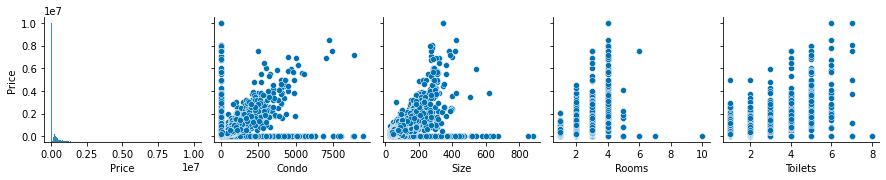

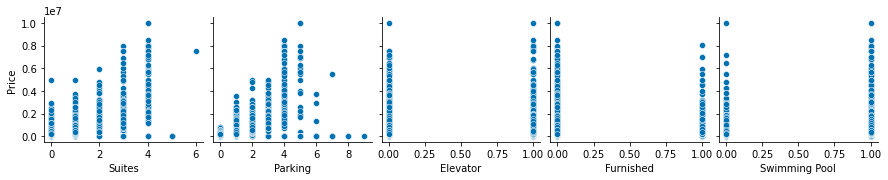

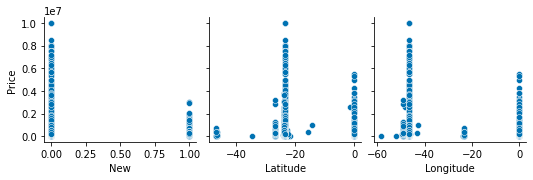

In [9]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                 x_vars=data_num.columns[i:i+5],
                 y_vars=['Price'])

Видно, что большинство признаков можно рассматривать как категориальные (они расположены на прямых x=const), а признак Condo и Size как непрерывные величины. Их корреляция сильна сбита из-за точек, которые находяться на линиях y = 0 и x = 0, но это не выбросы. Попробуем убрать эти линии из Condo и Size и пересчитаем их корреляции.

In [10]:
cont_data = data[['Size', 'Condo', 'Price']]
cont_data[cont_data['Price'] < 5] = np.NaN
cont_data[cont_data[['Size', 'Condo']] < 5] = np.NaN
cont_data.dropna(axis=0, inplace=True)

cont_data.shape

(11635, 3)

In [11]:
corr_data = cont_data.corr()['Price'][:-1]
correlated_features_list = corr_data[abs(corr_data) > 0.3].sort_values(ascending=False)
print("There are {} correlated values with Price:\n{}".format(len(correlated_features_list), 
                                                                          correlated_features_list))

There are 2 correlated values with Price:
Size     0.334302
Condo    0.314130
Name: Price, dtype: float64


Можно заметить, что корреляция Conda подросла до уровня Size, но все равно связь не очень сильная.

**Корреляция между признаками**

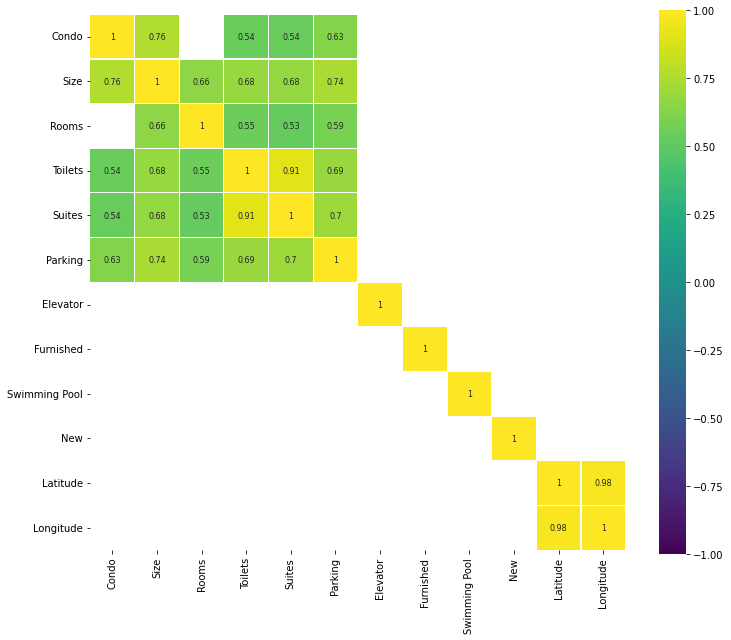

In [12]:
corr = data_num.drop('Price', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Многие признаки коррелируют между собой.

Например кол-во туалетов в квартире коррелирует с размером, что в общем логично. Или размер квартиры с кол-вом мест в паркинге.


Таким образом, для сильно скоррелированных признаков (Suites/Toilets, Latitude/Longtitude) в модель имеет смысл включать лишь один из пары.

## Визуальный анализ признаков

In [13]:
df_categ = data.select_dtypes(include=['int64', 'O']).drop(['Condo', 'Size'], axis=1)
df_categ.head()

,Price,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type
0,930,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
1,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
2,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
3,1000,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment
4,1300,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment


Отобразим некоторые из признаков \
(для визуализации используем ящик с усами: https://ru.wikipedia.org/wiki/Ящик_с_усами)


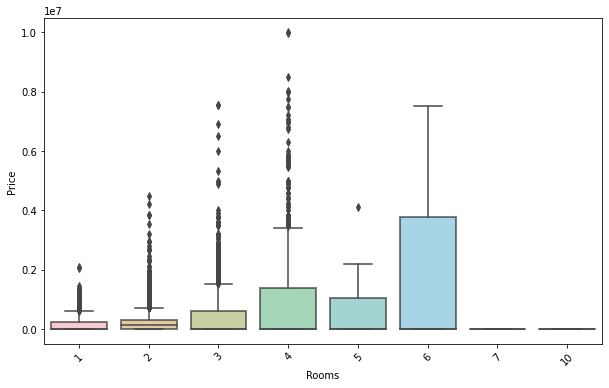

In [14]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Rooms', y='Price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45);

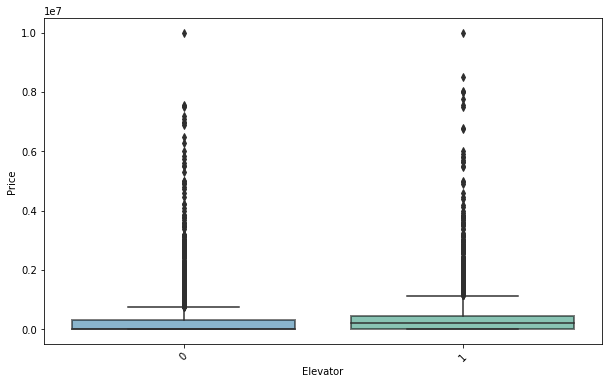

In [15]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Elevator', y='Price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45);

Отобразим некоторые из признаков

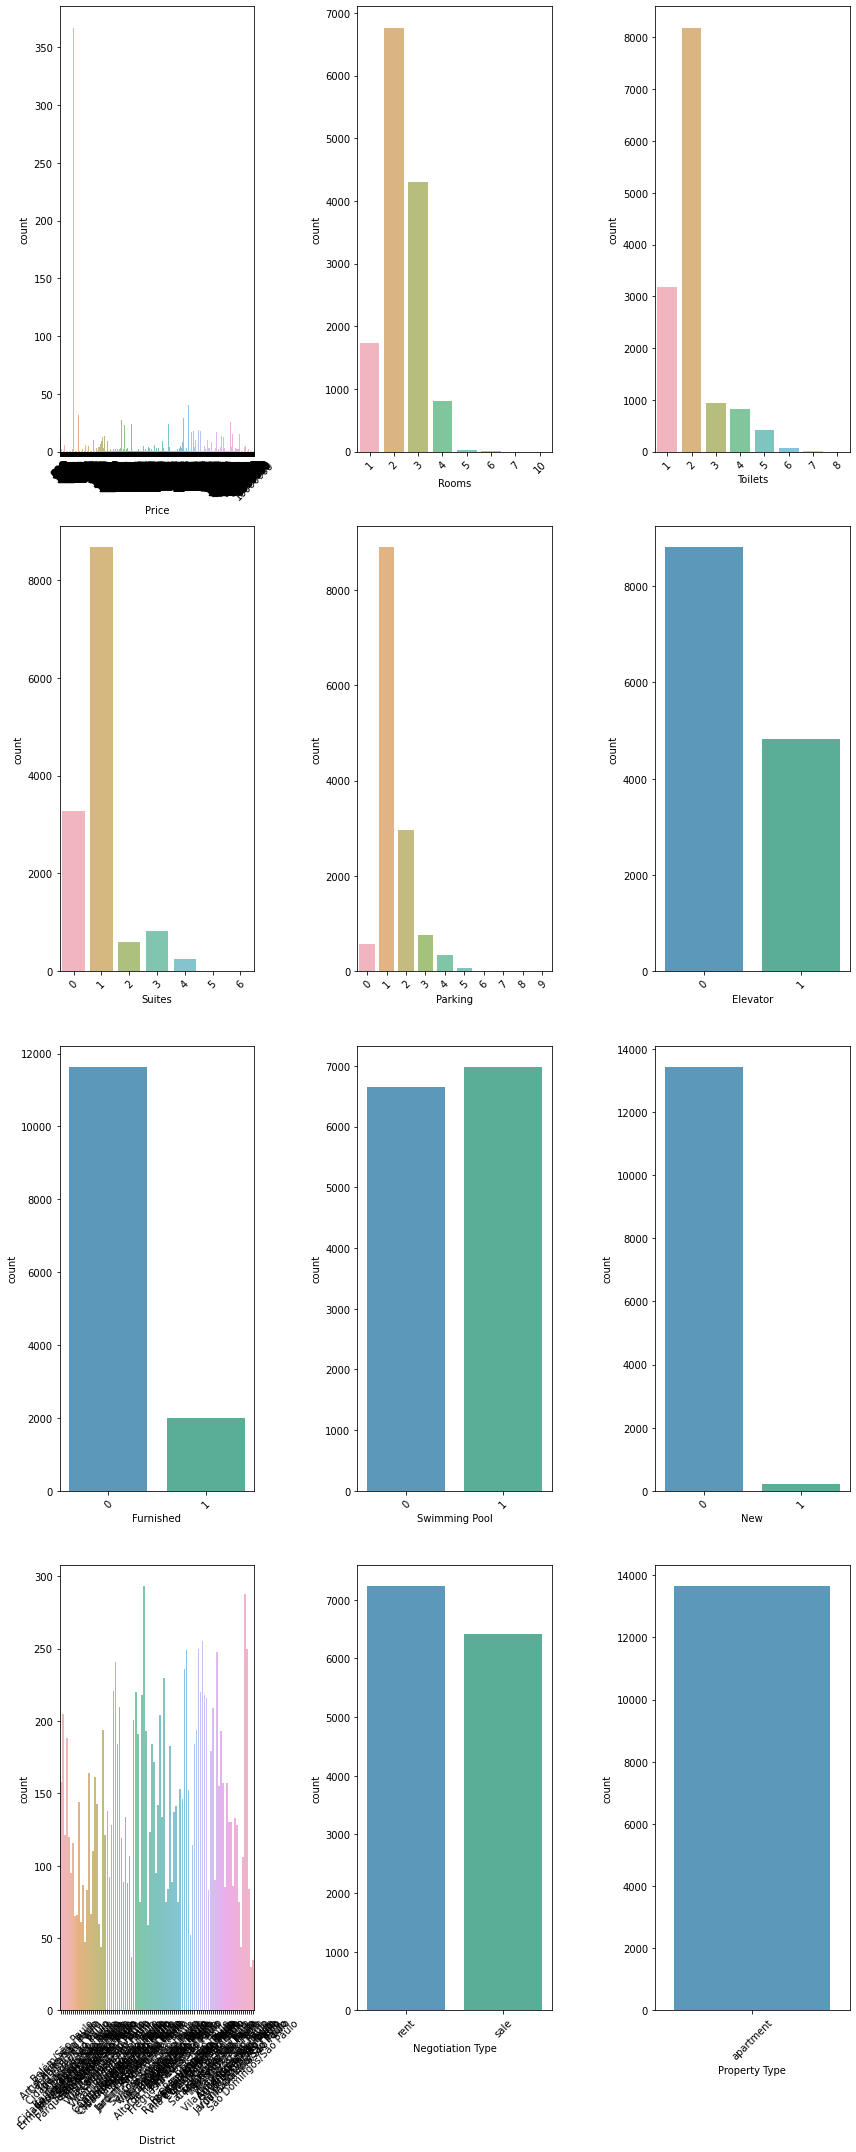

In [16]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_categ.columns[i], alpha=0.7, data=df_categ, ax=ax) 

fig.tight_layout()

Признак New содержит слишком мало значений 1, поэтому его можно выкинуть. Признак Property Type содержит единственное значение, поэтому его можно выкинуть. Эти признаки не несут в себе информации для дальнейшего моделирования. 

1. Таким образом в датасете не было пропущенных значений.
2. Исходя из корреляции между переменными нужно удалить такие признаки как Toilets, Longitude.
3. После анализа категориальных признаков, мы убрали признак New и Property Type.
4. Итоговый набор: 
'Price',
 'Condo',
 'Size',
 'Rooms', 
 'Suites',
 'Parking',
 'Elevator',
 'Furnished',
 'Swimming Pool', 
 'District',
 'Negotiation Type', 
 'Latitude',
 'Longitude'

In [17]:
data_f = data.drop(['Toilets','Longitude','New','Property Type'], axis =1)
data_f.head()

,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Negotiation Type,Latitude
0,930,220,47,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.543138
1,1000,148,45,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.550239
2,1000,100,48,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.542818
3,1000,200,48,2,1,1,0,0,0,Artur Alvim/São Paulo,rent,-23.547171
4,1300,410,55,2,1,1,1,0,0,Artur Alvim/São Paulo,rent,-23.525025


## Кодирование категориальных признаков

Большинство моделей машинного обучение не умеют работать с категориальными признаками, \
поэтому нам необходимо закодировать их числовыми значениями. \

In [18]:
# рассмотрим категориальный признак
data_f['District'].value_counts()

Moema/São Paulo              293
Mooca/São Paulo              288
Brás/São Paulo               255
Brooklin/São Paulo           250
Bela Vista/São Paulo         250
                            ... 
Jardim São Luis/São Paulo     44
São Rafael/São Paulo          44
Grajaú/São Paulo              37
São Domingos/São Paulo        35
Perus/São Paulo               30
Name: District, Length: 96, dtype: int64

In [19]:
# рассмотрим категориальный признак
data_f['Negotiation Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

In [20]:
# простой способ, заменить значение на числовое 
feature = {"Negotiation Type": {"rent": 1, "sale": 2}}
data_encode = data_f.replace(feature)
data_encode['Negotiation Type'].value_counts()

1    7228
2    6412
Name: Negotiation Type, dtype: int64

In [21]:
# простой способ, заменить значение на числовое 
data_f["Negotiation Type"] = data_f["Negotiation Type"].astype('category')
data_f["Negotiation Type cat"] = data_f["Negotiation Type"].cat.codes
data_f['Negotiation Type cat'].value_counts()

0    7228
1    6412
Name: Negotiation Type cat, dtype: int64

In [22]:
data_f = data_f.drop('Negotiation Type cat', axis = 1)

In [23]:
# унитарное кодирование или one hot encoding
pd.get_dummies(data_f, columns=["Negotiation Type"]).head()
# вместо Negotiation Type появилось 2 новых признака Negotiation Type_rent	и Negotiation Type_sale соответствующими значениями 1 и 0

,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Negotiation Type_rent,Negotiation Type_sale
0,930,220,47,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,1,0
1,1000,148,45,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,1,0
2,1000,100,48,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,1,0
3,1000,200,48,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,1,0
4,1300,410,55,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,1,0


In [24]:
# продвинутый вариант, для него установим библиотеку
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


In [25]:
import category_encoders as ce

In [26]:
# Contrast Coding - Данный тип кодирование разбивает признак на уровни (в каждом только значения, относящиеся к одной категории). 
# Затем для каждого уровня вычисляется некоторая статистика. 
# Метод подходит для кодирования номинальных и частично упорядоченных признаков.
# Будем использовать кодирование обратной разницы (Backward Difference encoding) в этом методе сравнивается среднее для уровня со средним предыдущего уровня

data_tmp = data_f.copy()
encoder = ce.BackwardDifferenceEncoder(cols=["District"])
encoder.fit(data_tmp, verbose=1)

BackwardDifferenceEncoder(cols=['District'],
                          mapping=[{'col': 'District',
                                    'mapping':      District_0  District_1  District_2  District_3  District_4  District_5  \
 1    -0.989583   -0.979167    -0.96875   -0.958333   -0.947917     -0.9375   
 2     0.010417   -0.979167    -0.96875   -0.958333   -0.947917     -0.9375   
 3     0.010417    0.020833    -0.96875   -0.958333   -0.947917     -0.9375   
 4     0.010417    0.020833     0.03125   -0.958333   -0.947917     -0.9375   
 5     0.010...
 1     -0.041667     -0.03125    -0.020833    -0.010417  
 2     -0.041667     -0.03125    -0.020833    -0.010417  
 3     -0.041667     -0.03125    -0.020833    -0.010417  
 4     -0.041667     -0.03125    -0.020833    -0.010417  
 5     -0.041667     -0.03125    -0.020833    -0.010417  
..           ...          ...          ...          ...  
 94     0.958333      0.96875    -0.020833    -0.010417  
 95     0.958333      0.96875     0.

In [27]:
data_cat_enc = encoder.fit_transform(data_tmp, verbose=1) # набор данных после кодирования категориальных признаков
data_cat_enc = data_cat_enc.drop('Negotiation Type', axis = 1)
data_cat_enc.head()

,intercept,Price,Condo,Size,Rooms,Suites,Parking,Elevator,Furnished,Swimming Pool,...,District_86,District_87,District_88,District_89,District_90,District_91,District_92,District_93,District_94,Latitude
0,1,930,220,47,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.543138
1,1,1000,148,45,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.550239
2,1,1000,100,48,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.542818
3,1,1000,200,48,2,1,1,0,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.547171
4,1,1300,410,55,2,1,1,1,0,0,...,-0.09375,-0.083333,-0.072917,-0.0625,-0.052083,-0.041667,-0.03125,-0.020833,-0.010417,-23.525025


## Выбросы (Outliers)

Выброс - это любая точка данных, которая сильно отличается от остальных наблюдений в наборе.

Примеры:
- Когда успеваемость одного студента в среднем составляет более 90%, в то время как остальная часть группы находится на уровне 70% - явный выброс;
- Анализируя покупательские паттерны определенного клиента, выясняется, что внезапно появляется покупка с очень высокой стоимостью (например, 100 000). В то время как большинство транзакций данного клиента колеблется около 10 000. Независимо от причины покупка в 100 000 - это выброс среди общих данных;
- Usain Bolt - рекордные спринты определенно являются выбросами, когда рассматриваются большинство атлетов.

Просто удалять выбросы - не всегда хорошая идея. Выбросы могут быть вполне обоснованными наблюдениями, а иногда и самыми интересными.  Важно изучить природу выброса, прежде чем принимать решение.

1. Если очевидно, что выброс вызван неверно введенными или измеренными данными, его следует удалить.
2. Если выброс не изменяет результаты, но влияет на предположения, можно удалить выброс.  Однако стоит отметить данный момент в отчете. Также можно построить модель с и без учета данного выброса и посмотреть на полученные результаты.

Как найти выбросы?

1. Визуально

2. Математически

**Статистическая фильтрация**

In [28]:
from sklearn.datasets import load_iris, load_diabetes

In [29]:
# загрузка данных
data = load_diabetes()
x = data.data
y = data.target
columns = data.feature_names

df = pd.DataFrame(x)
df.columns = columns
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


**Box-plot**

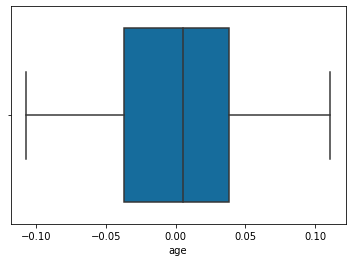

In [30]:
import seaborn as sns
sns.boxplot(x=df['age']);

Анатомия box-plots
![image.png](https://static.tildacdn.com/tild6130-3939-4833-b030-303762613530/image.png)

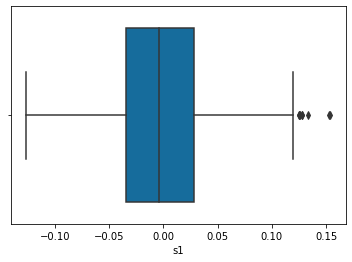

In [31]:
sns.boxplot(x=df['s1']);

Последний график показывает три точки-выброса между 0.1 и 0.15, не включенные в box с остальными наблюдениями, т.е. между квартилями.

**Scatter-plot**

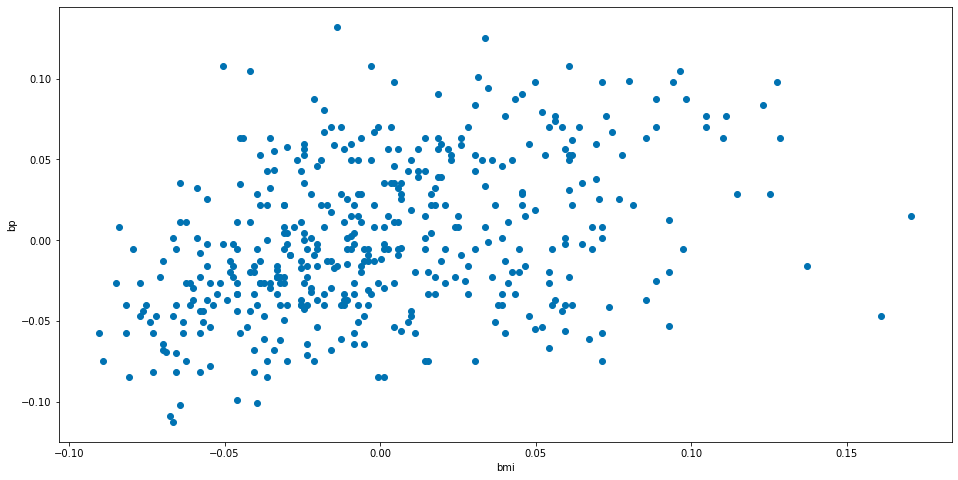

In [32]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df['bmi'], df['bp'])
ax.set_xlabel('bmi')
ax.set_ylabel('bp')
plt.show();

Не явно, но видны точки за пределами "облака".

**Z-Score**

Z-Score - это знаковое число стандартных отклонений, при котором значение точки наблюдения или данных превышает среднее значение наблюдаемого или измеряемого значения. [Z-core](https://en.wikipedia.org/wiki/Standard_score)

In [33]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.800500  1.065488  1.297088  0.459840  0.929746  0.732065  0.912451   
1    0.039567  0.938537  1.082180  0.553511  0.177624  0.402886  1.564414   
2    1.793307  1.065488  0.934533  0.119218  0.958674  0.718897  0.680245   
3    1.872441  0.938537  0.243771  0.770658  0.256292  0.525397  0.757647   
4    0.113172  0.938537  0.764944  0.459840  0.082726  0.327890  0.171178   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.876870  1.065488  0.413360  1.256044  0.119769  0.053957  0.602843   
438  0.115937  1.065488  0.334410  1.422098  1.037341  1.664355  0.602843   
439  0.876870  1.065488  0.334410  0.363330  0.785107  0.290965  0.525441   
440  0.956004  0.938537  0.821235  0.025547  0.343075  0.321306  0.602843   
441  0.956004  0.938537  1.535374  1.711626  1.760535  0.584649  3.654268   

           s4        s5        s6  
0    0.054499  0.418551  0.370989  
1  

In [34]:
threshold = 3
print(np.where(z > 3))

(array([ 58, 123, 123, 123, 216, 230, 230, 256, 260, 261, 269, 322, 336,
       367, 441]), array([6, 4, 5, 7, 7, 4, 5, 2, 6, 6, 6, 7, 7, 2, 6]))


In [ ]:
#print(z[58][6])
print(z)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.800500  1.065488  1.297088  0.459840  0.929746  0.732065  0.912451   
1    0.039567  0.938537  1.082180  0.553511  0.177624  0.402886  1.564414   
2    1.793307  1.065488  0.934533  0.119218  0.958674  0.718897  0.680245   
3    1.872441  0.938537  0.243771  0.770658  0.256292  0.525397  0.757647   
4    0.113172  0.938537  0.764944  0.459840  0.082726  0.327890  0.171178   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.876870  1.065488  0.413360  1.256044  0.119769  0.053957  0.602843   
438  0.115937  1.065488  0.334410  1.422098  1.037341  1.664355  0.602843   
439  0.876870  1.065488  0.334410  0.363330  0.785107  0.290965  0.525441   
440  0.956004  0.938537  0.821235  0.025547  0.343075  0.321306  0.602843   
441  0.956004  0.938537  1.535374  1.711626  1.760535  0.584649  3.654268   

           s4        s5        s6  
0    0.054499  0.418551  0.370989  
1  

Например, 58-е наблюдение является выбросом.

**IQR score**

The interquartile range (IQR), межквартильный интервал, также называемый средним или средним 50%, или технически H-спредом, является мерой статистической дисперсии, равной разнице между 75-м и 25-м процентилями, или между верхним и нижним квартилями, IQR = Q3 − Q1. [IQR](https://en.wikipedia.org/wiki/Interquartile_range)

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age    0.075375
sex    0.095322
bmi    0.065477
bp     0.072300
s1     0.062606
s2     0.060203
s3     0.064429
s4     0.073802
s5     0.065682
s6     0.061096
dtype: float64


Поскольку теперь у нас есть оценки IQR, выберем выбросы. Приведенный ниже код выдаст результат с истинными и ложными значениями. Точка данных с False означает, что эти значения действительны, тогда как True указывает на наличие выброса.

In [36]:
iris_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
iris_iqr.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [37]:
iris_iqr[iris_iqr.sum(axis=1) == 1].index

Int64Index([ 35,  58,  84, 117, 141, 168, 169, 202, 216, 245, 256, 260, 261,
            269, 276, 286, 336, 350, 353, 366, 367, 376, 406, 428, 441],
           dtype='int64')

Строчки с номерами 35,  58,  84, 117, 141, 168, 169, 202, 216, 245, 256, 260, 261,
            269, 276, 286, 336, 350, 353, 366, 367, 376, 406, 428, 441 являются выбросами

## Обработка пропущенных значений

In [38]:
# загрузка данных
data = pd.read_csv('/content/gdrive/MyDrive/курсы/мфти/ИАДиНС/data/diabetes.csv', sep=',') 
data = data.drop(["Outcome"], axis = 1) # удалим целевую переменную 

Сгенерируем пропуски, используя функцию pd.sample. \
Мы обычно рассматриваем пропущенные значения как пробелы в таблице данных, либо как строковые заполнители, такие как NaN (т.е. Not a number, не число).

In [39]:
data_nan = data.copy()
for i in range(15):
    random_part = data.sample(frac=0.005, axis=0).sample(n=3, axis=1)
    index = random_part.index
    col = random_part.columns[0]
    
    data_nan.loc[index, col] = np.NaN
    
data_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [40]:
data_nan.isna().sum()

Pregnancies                  8
Glucose                      8
BloodPressure                7
SkinThickness                8
Insulin                      8
BMI                          8
DiabetesPedigreeFunction    12
Age                          0
dtype: int64

**Удаление неполных векторов**

In [41]:
data_nan.shape

(768, 8)

In [42]:
# отбросить строки если в них есть пропуски
data_nan.dropna(axis = 0).shape 

(709, 8)

In [43]:
# отбросить столбцы если в них есть пропуски
data_nan.dropna(axis = 1).shape

(768, 1)

In [44]:
# отбросить строки, только если все столбцы содержат NaN
data_nan.dropna(how = 'all', axis = 0).shape

(768, 8)

In [45]:
# отбросить строки, если в них менее 3 значений не NaN
data_nan.dropna(thresh = 3).shape

(768, 8)

In [46]:
# отбросить столбцы, если в них менее 10 значений не NaN
data_nan.dropna(thresh = 10, axis = 1).shape

(768, 8)

**SimpleImputer** \


Класс SimpleImputer предоставляет основные стратегии для восстановления отсутствующих значений. Пропущенные значения могут быть восстановлены с использованием предоставленного постоянного значения или с использованием статистики (среднего, медианного или наиболее частого) каждого столбца, в котором находятся пропущенные значения. Этот класс также допускает различные кодировки пропущенных значений.

In [47]:
from sklearn.impute import SimpleImputer

sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0) # заполняем 0
data_NA_zero = sumple_imp.fit_transform(data_nan)
data_NA_zero = pd.DataFrame(data_NA_zero, columns = data_nan.columns)
data_NA_zero.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [48]:
data_NA_zero.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [49]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'mean') # mean - заполняем среднем, median - заполняем медианой, most_frequent - заполняем модой
data_NA_mean = sumple_imp.fit_transform(data_nan)
data_NA_mean = pd.DataFrame(data_NA_mean, columns = data_nan.columns)
data_NA_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [50]:
data_NA_mean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Функция Pandas **dataframe.interpolate()** в основном используется для заполнения значений NaN в кадре данных или серии. Но это очень мощная функция для заполнения пропущенных значений. Она использует различные методы интерполяции, чтобы заполнить пропущенные значения, а не жестко кодировать значение.

Интерполяция – способ нахождения промежуточных значений
величины по имеющемуся дискретному набору известных значений.

In [51]:
data_inter_linear = data_nan.interpolate(method='linear')#.fillna(0)

data_inter_linear.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [52]:
data_inter_linear.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

**Качество заполнения пропущенных значений**

In [53]:
datas = [data_NA_zero, data_NA_mean, data_inter_linear]
names = ['zero', 'mean', 'linear']
results = pd.Series(index=names)

for data_, name in zip(datas, names):
    results[name] = np.sqrt(np.mean((data - data_)**2, axis=0).mean()) 

results = results.sort_values(ascending=True)

results

mean      3.780421
linear    5.107340
zero      6.561164
dtype: float64

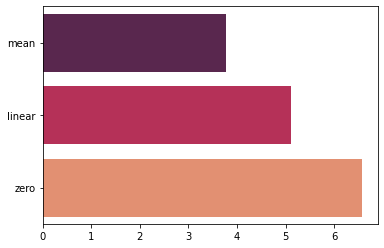

In [54]:
sns.barplot(y=results.index, x=results.values, palette='rocket', orient='h');

В данном случае заполнение средним значеним дало лучший результат